# ML for Security – лаба 1

In [1]:
import pandas as pd
import os
import pickle

In [2]:
files: list = os.listdir('data')

In [3]:
files

['classes_train.csv', 'features_train.csv']

In [4]:
classes_train = pd.read_csv(f"data/{files[0]}")

In [5]:
features_train = pd.read_csv(f"data/{files[1]}")

In [6]:
features_train.head(3)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142
2,704,3108,454,2400,77,0,0,0,1358,0.518409,2.288660,0.334315,1.767305,0.056701,6.845815,12,0,18,0,90


In [7]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import preprocessing
import sklearn

# 1. Базовый контест (делают все хоть как-то)

In [8]:
test_size: int = 0.7

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(features_train, classes_train, test_size=test_size, shuffle=True)

In [10]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [11]:
X_train.shape, X_test.shape

((720, 20), (1680, 20))

### XGBClassifier

In [12]:
import xgboost

In [13]:
xgb = xgboost.XGBClassifier()

In [14]:
xgb.fit(X_train, Y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [15]:
pred_xgb = xgb.predict(X_test)

In [16]:
xgb_res = f1_score(pred_xgb, Y_test)

#### Результат

In [17]:
xgb_res

0.9848308051341891

In [18]:
sklearn.metrics.confusion_matrix(pred_xgb, Y_test)

array([[1245,   10],
       [   3,  422]], dtype=int64)

### LGBMClassifier

In [19]:
import lightgbm

In [20]:
lgbm = lightgbm.LGBMClassifier()

In [21]:
lgbm.fit(X_train, Y_train.values.ravel())

LGBMClassifier()

In [22]:
pred_lgbm = lgbm.predict(X_test)

In [23]:
lgbm_res = f1_score(pred_lgbm, Y_test)

#### Результат

In [24]:
lgbm_res

0.9872537659327926

### GradientBoostingClassifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
gbc = GradientBoostingClassifier()

In [27]:
gbc.fit(X_train, Y_train.values.ravel())

GradientBoostingClassifier()

In [28]:
pred_gbc = gbc.predict(X_test)

In [29]:
gbc_res = f1_score(pred_gbc, Y_test)

#### Результат 

In [30]:
gbc_res

0.9884259259259259

### Итоги

In [31]:
#XGBClassifier
xgb_res

0.9848308051341891

In [32]:
#LightGBM
lgbm_res

0.9872537659327926

In [33]:
#GradientBoostingClassifier
gbc_res

0.9884259259259259

## Результат:

### По полученным результатам f1-score наиболее качественной моделью является модель LightGBM 

In [34]:
with open('models/LightGBM.pkl', 'wb') as f:
    pickle.dump(lgbm, f)

# 2. Вторичные контесты

In [35]:
#!pip install seaborn
#!pip install matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [36]:
features_train.head(2)

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,5124,6641,3074,13768,126,0,0,1,2711,1.890077,2.449650,1.133899,5.078569,0.046477,2.160377,12,0,14,0,73
1,10672,8465,1575,4561,191,0,1,1,4424,2.412297,1.913427,0.356013,1.030967,0.043174,5.374603,11,0,23,0,142


### XGBClassifier

In [37]:
xgb2 = xgboost.XGBClassifier()

In [38]:
xgb2.fit(X_train, Y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

#### Отбор признаков 

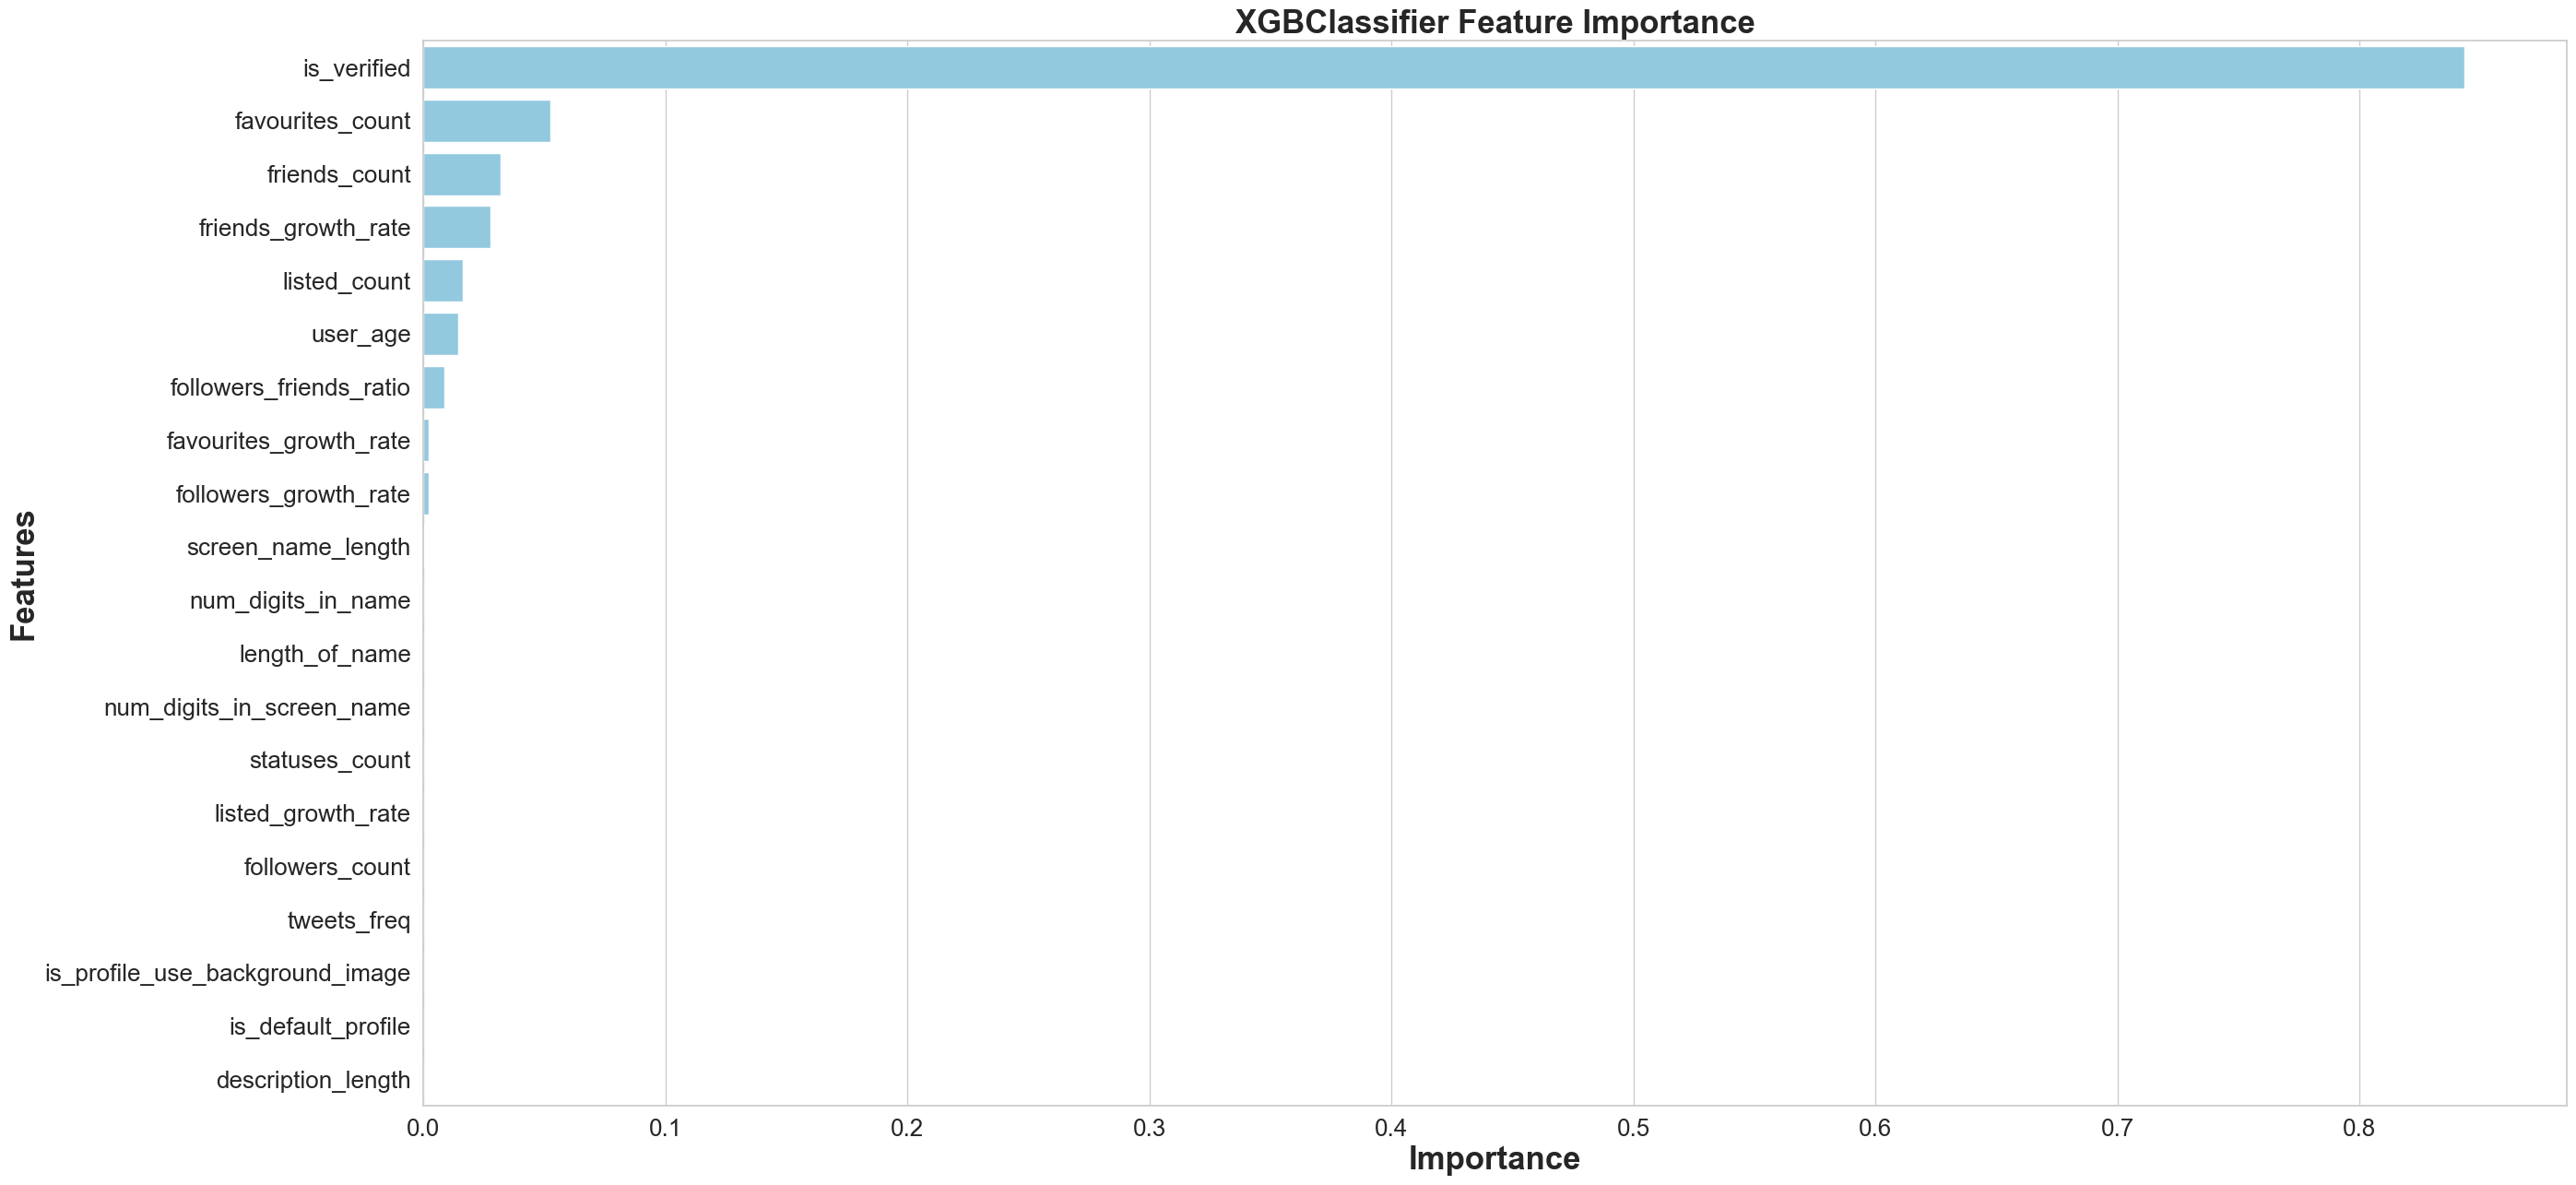

None

,Features,Gini-Importance
0,is_verified,0.843437
1,favourites_count,0.052362
2,friends_count,0.031982
3,friends_growth_rate,0.027904
4,listed_count,0.016476
5,user_age,0.014566
6,followers_friends_ratio,0.008572
7,favourites_growth_rate,0.002330
8,followers_growth_rate,0.002115
9,screen_name_length,0.000256


In [39]:
feats_xgb2 = {}
for feature, importance in zip(features_train.columns, xgb2.feature_importances_):
    feats_xgb2[feature] = importance
    importances_xgb2 = pd.DataFrame.from_dict(feats_xgb2, orient='index').rename(columns={0: 'Gini-Importance'})
    importances_xgb2 = importances_xgb2.sort_values(by='Gini-Importance', ascending=False)
    importances_xgb2 = importances_xgb2.reset_index()
    importances_xgb2 = importances_xgb2.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_xgb2['Gini-Importance'], y=importances_xgb2['Features'], data=importances_xgb2, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('XGBClassifier Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances_xgb2.head(10))

In [40]:
df_xgb2 = features_train[list(importances_xgb2.head(10)['Features'])]

In [41]:
X_train_xgb2, X_test_xgb2, Y_train_xgb2, Y_test_xgb2 = train_test_split(df_xgb2, classes_train, train_size=0.3)

In [42]:
scaler = preprocessing.StandardScaler()
X_train_xgb2 = scaler.fit_transform(X_train_xgb2)
X_test_xgb2 = scaler.fit_transform(X_test_xgb2)

#### Обучение модели 

In [43]:
xgb2 = xgboost.XGBClassifier()
xgb2.fit(X_train_xgb2, Y_train_xgb2.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [44]:
xgb2_pred = xgb2.predict(X_test_xgb2)

#### Результат 

In [45]:
confusion_matrix(Y_test_xgb2.values.ravel(), xgb2_pred, normalize = 'true')

array([[0.99442231, 0.00557769],
       [0.02352941, 0.97647059]])

### LightGBM

In [46]:
lgbm2 = lightgbm.LGBMClassifier(num_leaves=12, reg_lambda=0.05)

In [47]:
lgbm2.fit(X_train, Y_train.values.ravel())

LGBMClassifier(num_leaves=12, reg_lambda=0.05)

#### Отбор признаков 

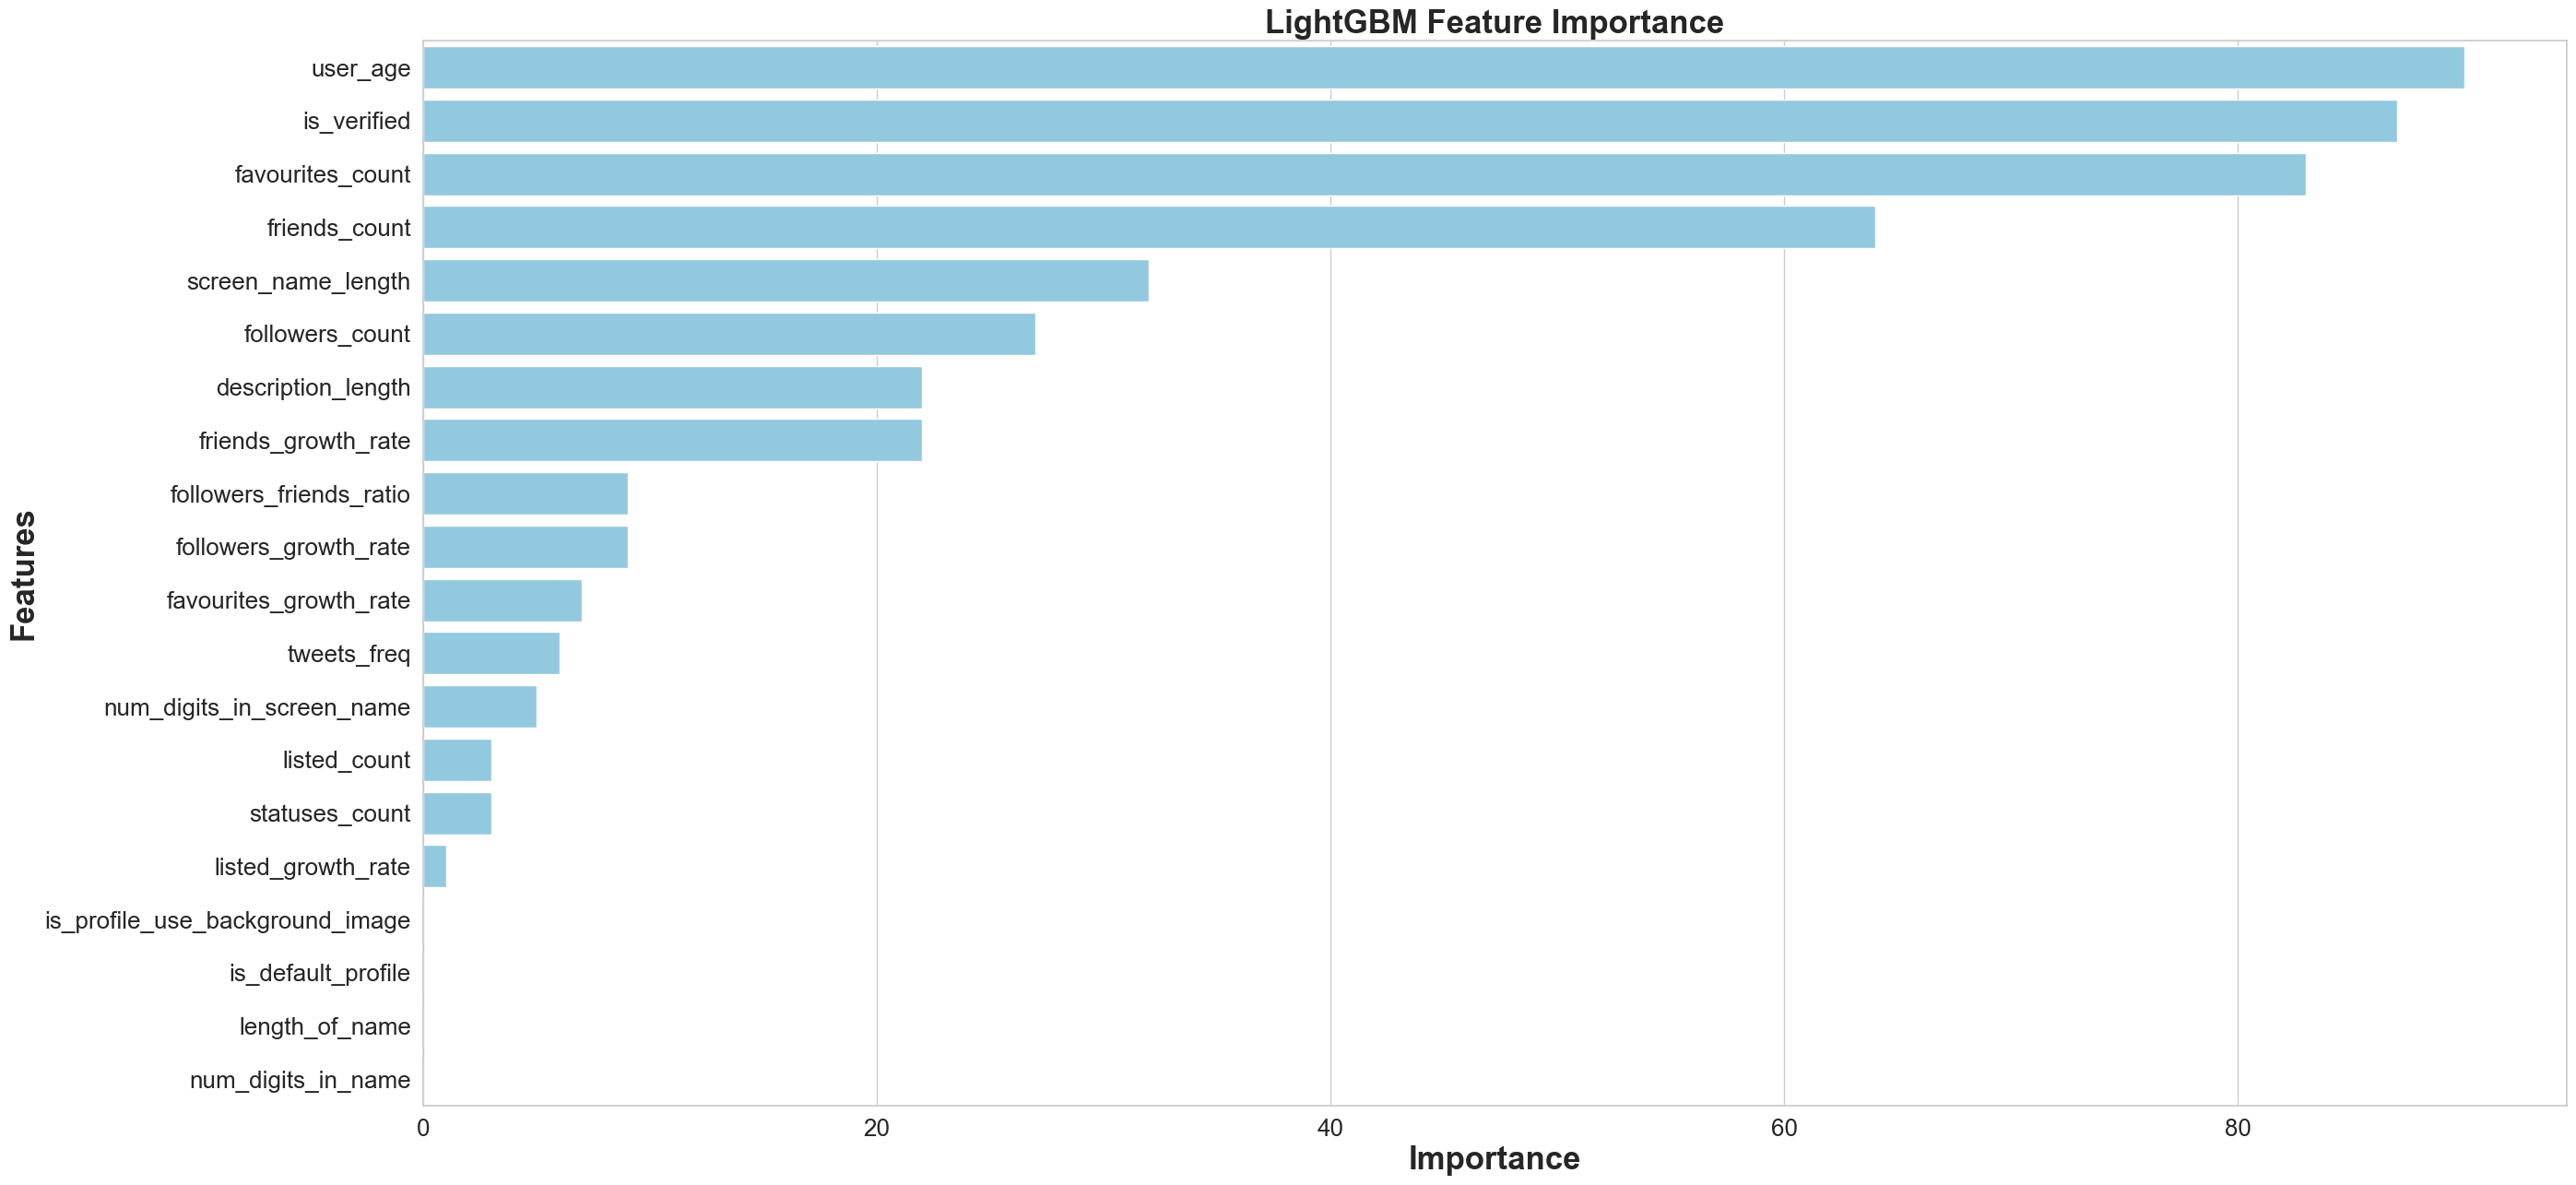

None

,Features,Gini-Importance
0,user_age,90
1,is_verified,87
2,favourites_count,83
3,friends_count,64
4,screen_name_length,32
5,followers_count,27
6,description_length,22
7,friends_growth_rate,22
8,followers_friends_ratio,9
9,followers_growth_rate,9


In [48]:
feats_lgbm2 = {}
for feature, importance in zip(features_train.columns, lgbm2.feature_importances_):
    feats_lgbm2[feature] = importance
    importances_lgbm2 = pd.DataFrame.from_dict(feats_lgbm2, orient='index').rename(columns={0: 'Gini-Importance'})
    importances_lgbm2 = importances_lgbm2.sort_values(by='Gini-Importance', ascending=False)
    importances_lgbm2 = importances_lgbm2.reset_index()
    importances_lgbm2 = importances_lgbm2.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_lgbm2['Gini-Importance'], y=importances_lgbm2['Features'], data=importances_lgbm2, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('LightGBM Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances_lgbm2.head(10))

In [49]:
df_lgbm2 = features_train[list(importances_lgbm2.head(10)['Features'])]

In [50]:
X_train_lgbm2, X_test_lgbm2, Y_train_lgbm2, Y_test_lgbm2 = train_test_split(df_lgbm2, classes_train, train_size=0.3)

In [51]:
scaler = preprocessing.StandardScaler()
X_train_lgbm2 = scaler.fit_transform(X_train_lgbm2)
X_test_lgbm2 = scaler.fit_transform(X_test_lgbm2)

#### Обучение модели

In [52]:
lgbm2 = lightgbm.LGBMClassifier(num_leaves=12, reg_lambda=0.05)
lgbm2.fit(X_train_lgbm2, Y_train_lgbm2.values.ravel())

LGBMClassifier(num_leaves=12, reg_lambda=0.05)

In [53]:
lgbm2_pred = lgbm2.predict(X_test_lgbm2)

In [54]:
f1_score(lgbm2_pred, Y_test_lgbm2)

0.9647887323943661

#### Результат 

In [55]:
confusion_matrix(lgbm2_pred, Y_test_lgbm2, normalize='pred')

array([[0.99678198, 0.05949657],
       [0.00321802, 0.94050343]])

### GradientBoostingClassifier

In [56]:
gbc2 = GradientBoostingClassifier()

In [57]:
gbc2.fit(X_train, Y_train.values.ravel())

GradientBoostingClassifier()

#### Отбор признаков 

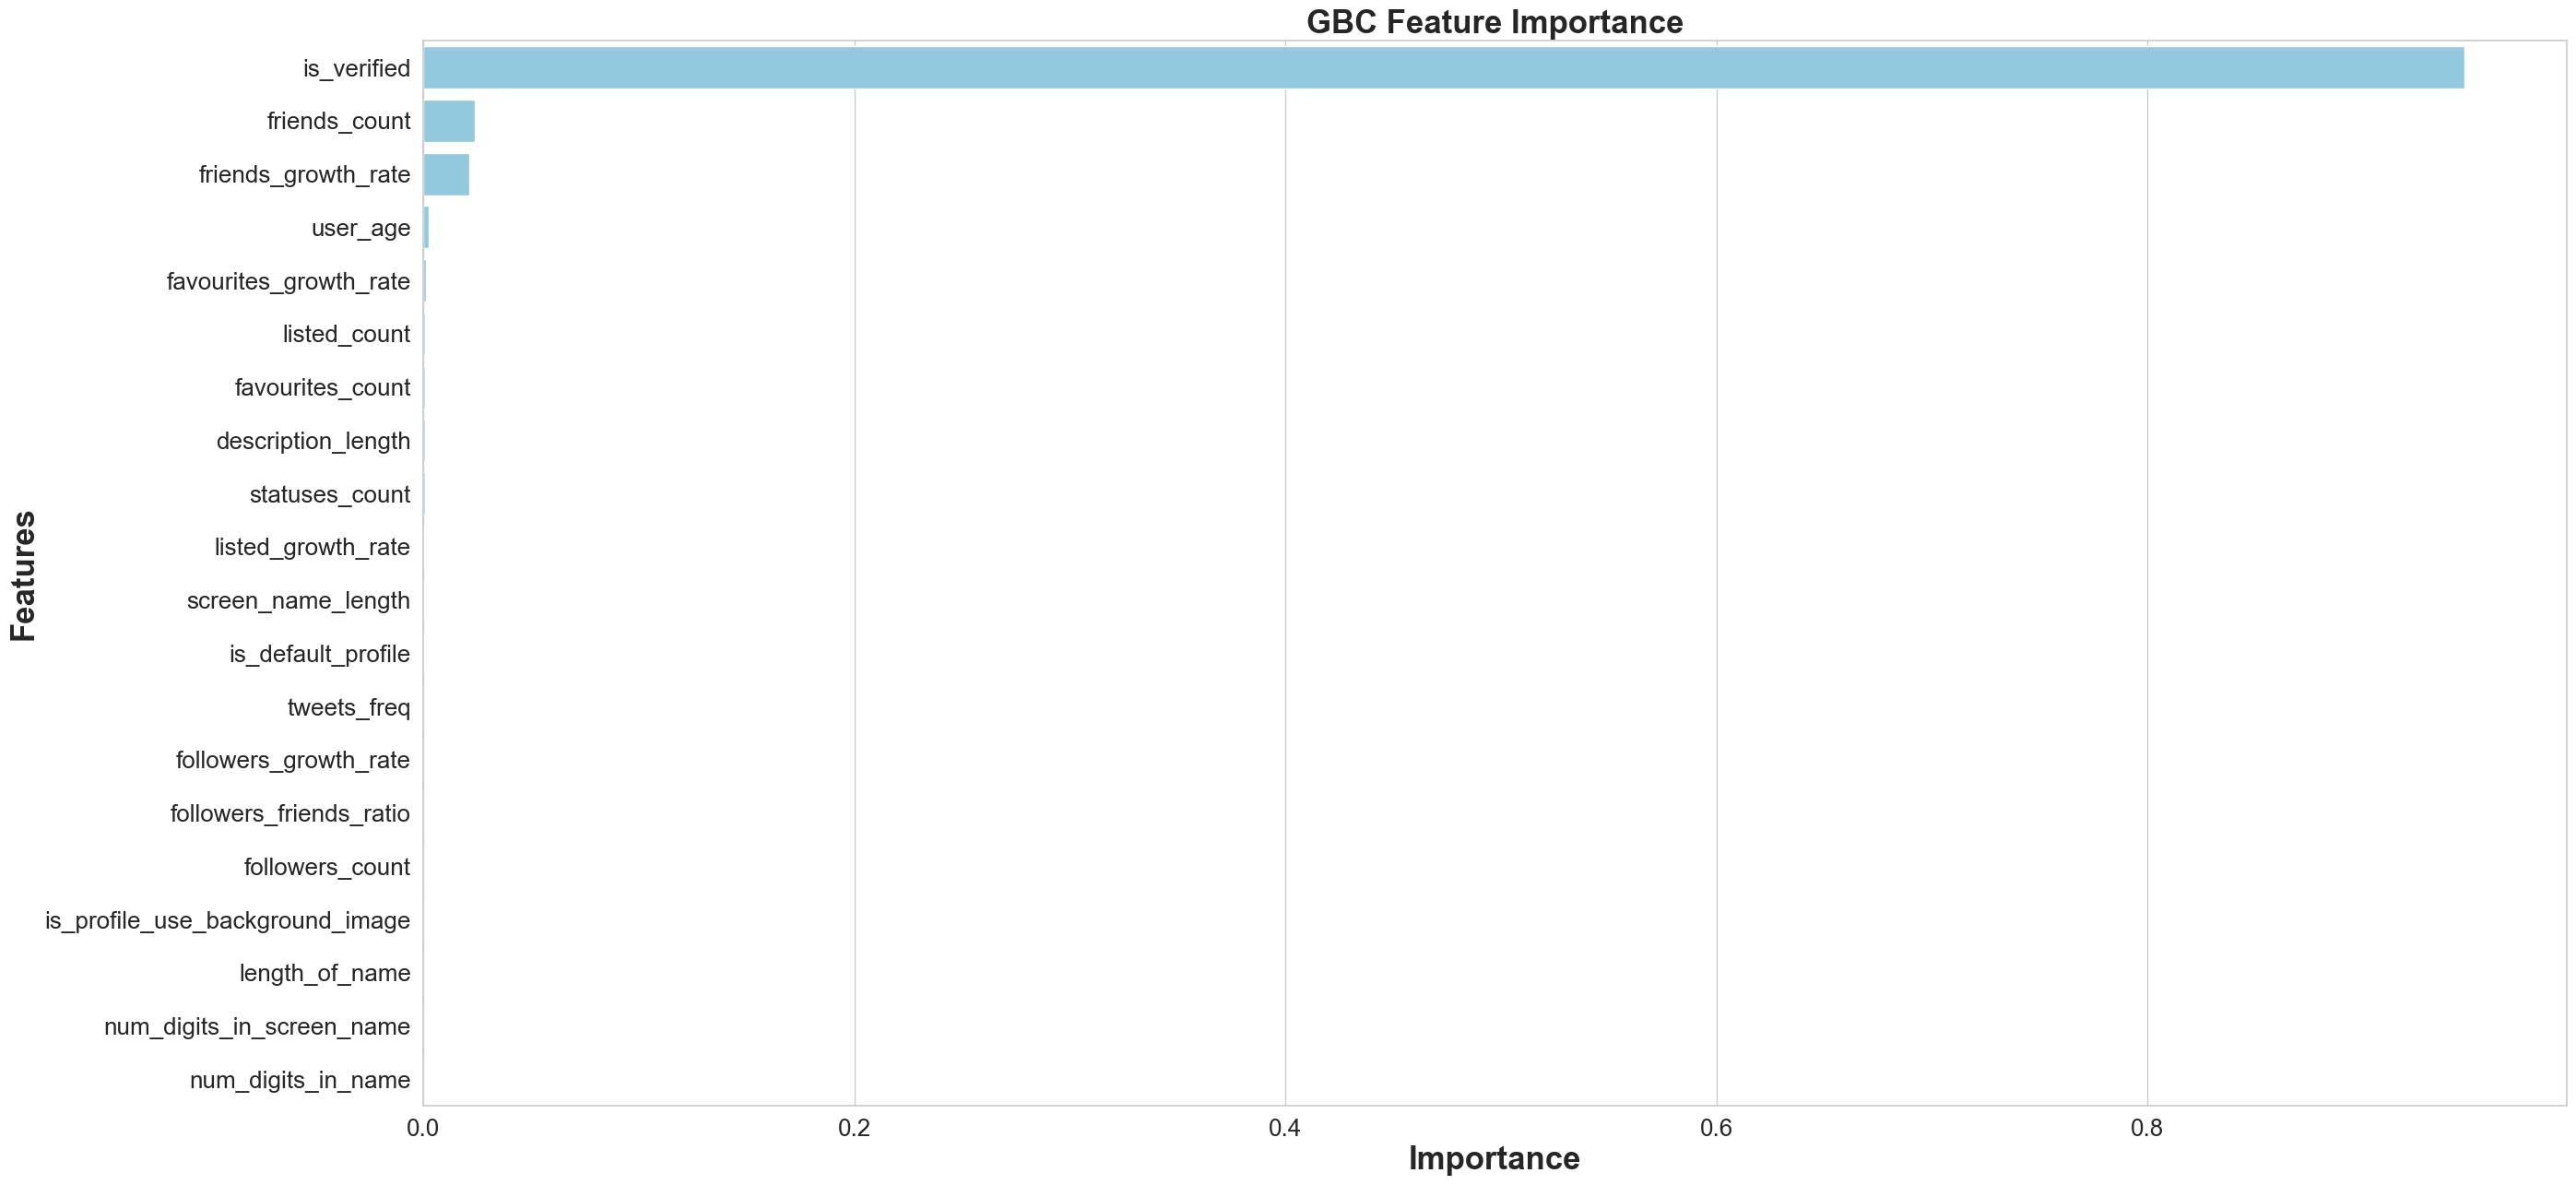

None

,Features,Gini-Importance
0,is_verified,0.947282
1,friends_count,0.023794
2,friends_growth_rate,0.021364
3,user_age,0.002478
4,favourites_growth_rate,0.001166
5,listed_count,0.000944
6,favourites_count,0.000749
7,description_length,0.000749
8,statuses_count,0.000629
9,listed_growth_rate,0.000312


In [58]:
feats_gbc2 = {}
for feature, importance in zip(features_train.columns, gbc2.feature_importances_):
    feats_gbc2[feature] = importance
    importances_gbc2 = pd.DataFrame.from_dict(feats_gbc2, orient='index').rename(columns={0: 'Gini-Importance'})
    importances_gbc2 = importances_gbc2.sort_values(by='Gini-Importance', ascending=False)
    importances_gbc2 = importances_gbc2.reset_index()
    importances_gbc2 = importances_gbc2.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances_gbc2['Gini-Importance'], y=importances_gbc2['Features'], data=importances_gbc2, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('GBC Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances_gbc2.head(10))

In [59]:
df_gbc2 = features_train[list(importances_gbc2.head(10)['Features'])]

In [60]:
X_train_gbc2, X_test_gbc2, Y_train_gbc2, Y_test_gbc2 = train_test_split(df_gbc2, classes_train, train_size=0.3)

In [61]:
scaler = preprocessing.StandardScaler()
X_train_gbc2 = scaler.fit_transform(X_train_gbc2)
X_test_gbc2 = scaler.fit_transform(X_test_gbc2)

#### Обучение модели 

In [62]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_gbc2, Y_train_gbc2.values.ravel())

GradientBoostingClassifier()

In [63]:
gbc2_pred = gbc2.predict(X_test_gbc2)

#### Результат 

In [64]:
confusion_matrix(Y_test_gbc2.values.ravel(), gbc2_pred, normalize = 'true')

array([[0.99124901, 0.00875099],
       [0.00945626, 0.99054374]])

### Итоги 

In [65]:
confusion_matrix(pred_xgb, Y_test, normalize='pred')

array([[0.99759615, 0.02314815],
       [0.00240385, 0.97685185]])

In [66]:
confusion_matrix(lgbm2_pred, Y_test_lgbm2, normalize='pred')

array([[0.99678198, 0.05949657],
       [0.00321802, 0.94050343]])

In [67]:
confusion_matrix(Y_test_gbc2.values.ravel(), gbc2_pred, normalize='true')

array([[0.99124901, 0.00875099],
       [0.00945626, 0.99054374]])

## Результат:

### По полученным результатам confusion_matrix наиболее качественной моделью является модель XGBClassifier 

In [68]:
with open('models/xgb.pkl', 'wb') as f:
    pickle.dump(xgb2, f)